In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [25]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [26]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b20a51962f34dec5e2ab6dd519585922


In [27]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [28]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [29]:
from citipy import citipy

In [30]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

598

In [31]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [32]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | araouane
Processing Record 3 of Set 1 | butaritari
Processing Record 4 of Set 1 | esna
Processing Record 5 of Set 1 | sandpoint
Processing Record 6 of Set 1 | makat
Processing Record 7 of Set 1 | nanortalik
Processing Record 8 of Set 1 | qaanaaq
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | vaini
Processing Record 11 of Set 1 | chokurdakh
Processing Record 12 of Set 1 | cape town
Processing Record 13 of Set 1 | dikson
Processing Record 14 of Set 1 | igrim
Processing Record 15 of Set 1 | dukat
Processing Record 16 of Set 1 | arraial do cabo
Processing Record 17 of Set 1 | techiman
Processing Record 18 of Set 1 | thompson
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | hilo
Processing Record 21 of Set 1 | new norfolk
Processing Record 22 of Set 1 | hithadhoo
Processing Record 23 of Set 1 | katangli
Processi

Processing Record 38 of Set 4 | katsuura
Processing Record 39 of Set 4 | kaitangata
Processing Record 40 of Set 4 | iquitos
Processing Record 41 of Set 4 | senador jose porfirio
Processing Record 42 of Set 4 | mogzon
Processing Record 43 of Set 4 | kavieng
Processing Record 44 of Set 4 | grand island
Processing Record 45 of Set 4 | sampit
Processing Record 46 of Set 4 | leh
Processing Record 47 of Set 4 | akyab
Processing Record 48 of Set 4 | warqla
City not found. Skipping...
Processing Record 49 of Set 4 | kovdor
Processing Record 50 of Set 4 | xichang
Processing Record 1 of Set 5 | ust-omchug
Processing Record 2 of Set 5 | grand river south east
City not found. Skipping...
Processing Record 3 of Set 5 | chuy
Processing Record 4 of Set 5 | napier
Processing Record 5 of Set 5 | tasbuget
City not found. Skipping...
Processing Record 6 of Set 5 | requena
Processing Record 7 of Set 5 | biak
Processing Record 8 of Set 5 | ust-bolsheretsk
City not found. Skipping...
Processing Record 9 of 

Processing Record 28 of Set 8 | pachelma
Processing Record 29 of Set 8 | rungata
City not found. Skipping...
Processing Record 30 of Set 8 | lagoa
Processing Record 31 of Set 8 | bolungarvik
City not found. Skipping...
Processing Record 32 of Set 8 | bambous virieux
Processing Record 33 of Set 8 | buraydah
Processing Record 34 of Set 8 | paradwip
City not found. Skipping...
Processing Record 35 of Set 8 | samusu
City not found. Skipping...
Processing Record 36 of Set 8 | moree
Processing Record 37 of Set 8 | amurzet
Processing Record 38 of Set 8 | livingston
Processing Record 39 of Set 8 | tiarei
Processing Record 40 of Set 8 | ribeira grande
Processing Record 41 of Set 8 | safaga
Processing Record 42 of Set 8 | svetlogorsk
Processing Record 43 of Set 8 | vedaranniyam
City not found. Skipping...
Processing Record 44 of Set 8 | teya
Processing Record 45 of Set 8 | bubaque
Processing Record 46 of Set 8 | tual
Processing Record 47 of Set 8 | koslan
Processing Record 48 of Set 8 | jamiltep

Processing Record 11 of Set 12 | sao sebastiao
Processing Record 12 of Set 12 | severobaykalsk
Processing Record 13 of Set 12 | samalaeulu
City not found. Skipping...
Processing Record 14 of Set 12 | aklavik
Processing Record 15 of Set 12 | port lincoln
Processing Record 16 of Set 12 | ponta delgada
Processing Record 17 of Set 12 | kalmunai
Processing Record 18 of Set 12 | mandalgovi
Processing Record 19 of Set 12 | youghal
Processing Record 20 of Set 12 | sao filipe
Processing Record 21 of Set 12 | leninskoye
Processing Record 22 of Set 12 | buchanan
Processing Record 23 of Set 12 | bukachacha
Processing Record 24 of Set 12 | baykit
Processing Record 25 of Set 12 | conroe
Processing Record 26 of Set 12 | kapuskasing
Processing Record 27 of Set 12 | wad madani
Processing Record 28 of Set 12 | laukaa
Processing Record 29 of Set 12 | coihueco
Processing Record 30 of Set 12 | texiguat
Processing Record 31 of Set 12 | itarema
Processing Record 32 of Set 12 | berlevag
Processing Record 33 o

In [33]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Puerto Ayora,-0.7393,-90.3518,78.80,83,75,9.22,EC,2021-04-18 22:35:49
1,Araouane,18.9048,-3.5265,83.08,10,0,9.62,ML,2021-04-18 22:35:50
2,Butaritari,3.0707,172.7902,83.17,75,81,14.05,KI,2021-04-18 22:32:21
3,Esna,25.2934,32.5540,86.00,32,0,5.75,EG,2021-04-18 22:35:50
4,Sandpoint,48.2766,-116.5533,72.00,21,40,9.22,US,2021-04-18 22:35:51
5,Makat,47.6469,53.3463,59.52,61,100,5.41,KZ,2021-04-18 22:35:51
6,Nanortalik,60.1432,-45.2371,28.81,60,18,10.65,GL,2021-04-18 22:35:52
7,Qaanaaq,77.4840,-69.3632,3.72,77,99,4.85,GL,2021-04-18 22:35:52
8,Mataura,-46.1927,168.8643,57.99,85,94,1.99,NZ,2021-04-18 22:35:52
9,Vaini,-21.2000,-175.2000,80.60,74,75,9.22,TO,2021-04-18 22:35:53


In [11]:
new_column_order = ["City", "Country", "Date","Lat", "Lng", "Max Temp","Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Castro,BR,2021-04-17 20:16:23,-24.7911,-50.0119,65.44,87,85,3.24
1,Todos Santos,MX,2021-04-17 20:18:42,23.4500,-110.2167,66.99,77,0,5.99
2,Albany,US,2021-04-17 20:18:42,42.6001,-73.9662,50.00,52,100,6.89
3,Atuona,PF,2021-04-17 20:15:15,-9.8000,-139.0333,80.31,76,32,18.88
4,Ushuaia,AR,2021-04-17 20:15:30,-54.8000,-68.3000,60.80,39,40,13.80
5,Makakilo City,US,2021-04-17 20:18:43,21.3469,-158.0858,78.80,57,1,10.36
6,Skagen,DK,2021-04-17 20:18:43,57.7209,10.5839,51.01,52,81,5.01
7,Grand Gaube,MU,2021-04-17 20:18:42,-20.0064,57.6608,79.00,86,20,9.24
8,Bahia Blanca,AR,2021-04-17 20:18:44,-38.7196,-62.2724,74.57,62,54,5.64
9,Zholymbet,KZ,2021-04-17 20:18:44,51.7433,71.7122,42.84,79,24,6.06


In [34]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [35]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

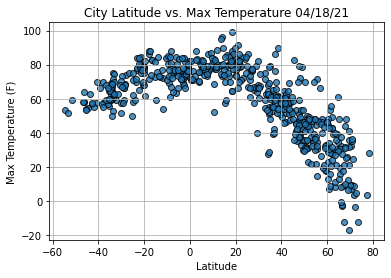

In [36]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

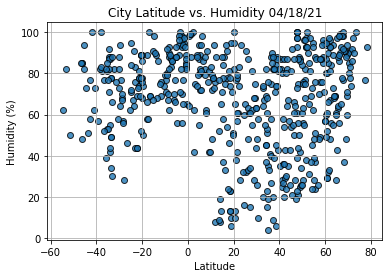

In [37]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

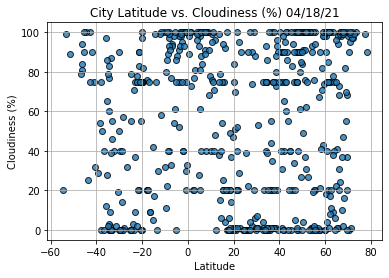

In [38]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

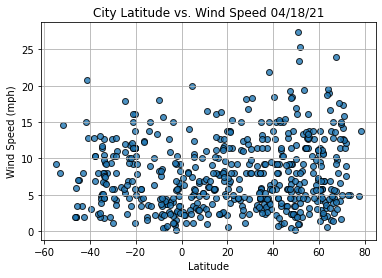

In [39]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [40]:
# Import linregress
from scipy.stats import linregress

In [41]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [42]:
index13 = city_data_df.loc[13]
index13

City                        Igrim
Lat                       63.1906
Lng                       64.4162
Max Temp                     8.11
Humidity                       94
Cloudiness                      9
Wind Speed                    3.2
Country                        RU
Date          2021-04-18 22:35:54
Name: 13, dtype: object

In [45]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

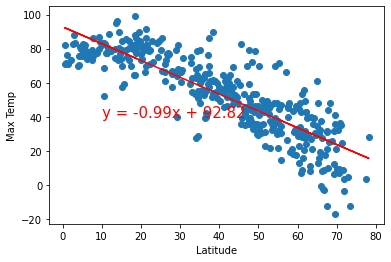

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

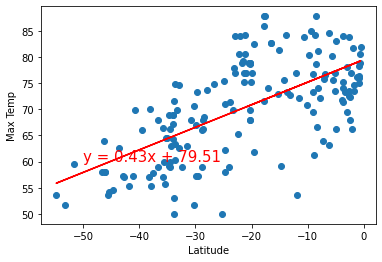

In [60]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,60))

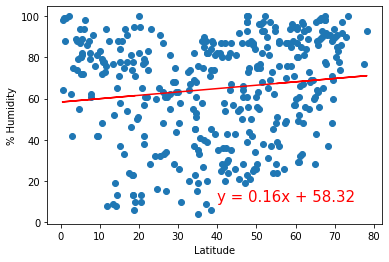

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

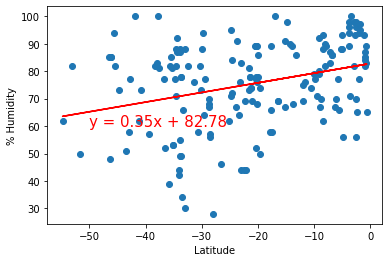

In [59]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,60))

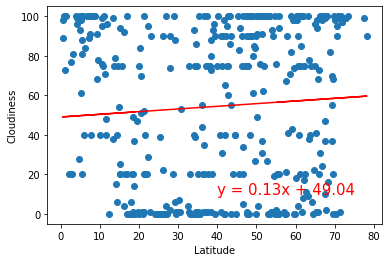

In [55]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Cloudiness', 'Cloudiness',(40,10))

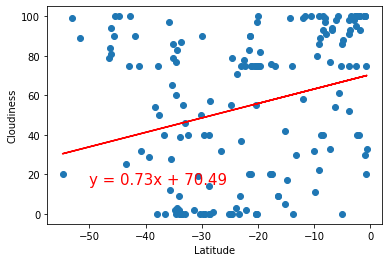

In [58]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Cloudiness', 'Cloudiness',(-50,15))

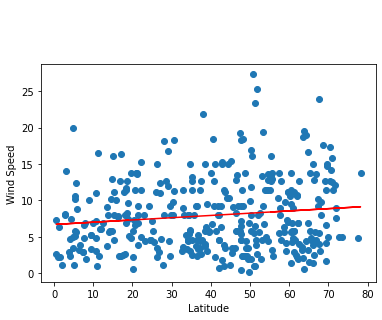

In [63]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

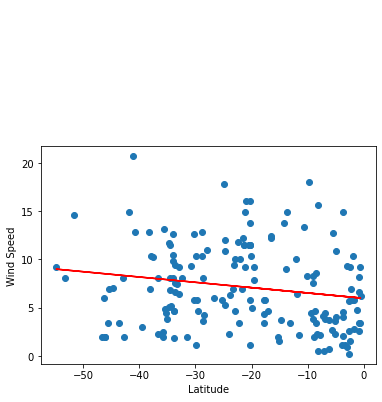

In [65]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))